In [5]:
#PMDD Classifcation using Deep Learning in TensorFlow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [10]:
# Load dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('womens_health_mood_disorders_with_pms.csv')
df.head()

Saving womens_health_mood_disorders_with_pms.csv to womens_health_mood_disorders_with_pms (2).csv


,Participant_ID,Age,Menstrual_Cycle_Regularity,History_of_Mood_Disorders,PMDD_Diagnosis,PPD_Diagnosis,Severity_of_Symptoms,Treatment_History,Lifestyle_Factors,Stress_Levels,PMS_Diagnosis
0,1,24,Irregular,Yes,No,No,5,Both,Healthy,3,No
1,2,37,Regular,No,No,No,5,Therapy,Healthy,2,No
2,3,46,Regular,No,No,No,7,Medication,Moderate,7,No
3,4,32,Regular,No,No,No,4,Medication,Moderate,5,No
4,5,28,Regular,No,No,No,4,NaN,Unhealthy,1,No


In [12]:
# Add Category Feature and Target
target_col = 'PMDD_Diagnosis'
Label_encoder = LabelEncoder()
df[target_col] = Label_encoder.fit_transform(df[target_col])

In [13]:
# Select the Feature
X = df.drop(columns=[target_col])
y = df[target_col]

In [16]:
# Add the Category Columns
X = pd.get_dummies(X, drop_first=True)

In [15]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= .2, random_state=42)

In [17]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [30]:
# Build the Model with Regularization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(.01)),
    Dropout(.3),
    Dense(32, activation='relu', kernel_regularizer=l2(.01)),
    Dropout(.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train the Model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5979 - loss: 1.2888 - val_accuracy: 0.8250 - val_loss: 1.0746
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8355 - loss: 1.0165 - val_accuracy: 0.8250 - val_loss: 0.9832
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8275 - loss: 0.9942 - val_accuracy: 0.8250 - val_loss: 0.9157
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8445 - loss: 0.8778 - val_accuracy: 0.8250 - val_loss: 0.8568
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8790 - loss: 0.7844 - val_accuracy: 0.8250 - val_loss: 0.8064
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8584 - loss: 0.7398 - val_accuracy: 0.8250 - val_loss: 0.7646
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8351 - loss: 0.7305 - val_accuracy: 0.8250 - val_loss: 0.7268
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8562 - loss: 0.6634 - val_accuracy: 0.8250 - val_loss

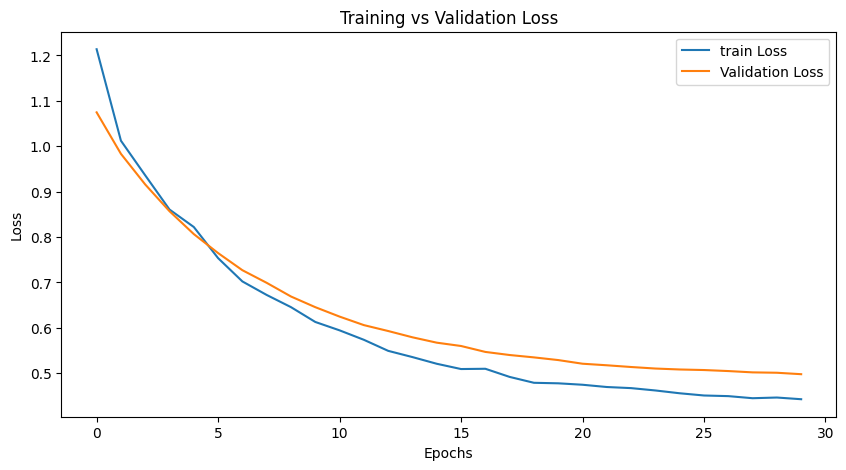

In [32]:
# Plot Training and Validation Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [33]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_val_scaled, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7894 - loss: 0.5584 
Validation Accuracy: 0.8250
